<a href="https://colab.research.google.com/github/gabriele16/cp2k/blob/nequip-cp2k-colab/colab/nequip-cp2k-water-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular Dynamics of bulk water with NequIP and CP2K

<img src="https://github.com/gabriele16/cp2k/blob/master/tools/logo/cp2k_logo_500.png?raw=true" width="35%"> <img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/nequip3.png?raw=true" width="40%">




### Tutorial by Gabriele Tocci

### The water trajectory is obtained with the SCAN functional at 300 K and is the last 5 ps (10k frames) of a trajectory used in the paper by Herrero et al.: [Connection between water's dynamical and structural properties: Insights from ab initio simulations ](https://www.pnas.org/doi/10.1073/pnas.2121641119)

### Open in colab and change the runtime to use the GPU

### CP2K supports the following GPU architectures:
* K20X, K40, K80, P100, V100, Mi50, Mi100, Mi250



### Update system and cuda (not needed for now)

In [ ]:
# !wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
# !mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
# !wget https://developer.download.nvidia.com/compute/cuda/11.7.0/local_installers/cuda-!repo-ubuntu1804-11-7-local_11.7.0-515.43.04-1_amd64.deb
# !dpkg -i cuda-repo-ubuntu1804-11-7-local_11.7.0-515.43.04-1_amd64.deb
# !cp /var/cuda-repo-ubuntu1804-11-7-local/cuda-*-keyring.gpg /usr/share/keyrings/
#!apt-get update
#!apt-get -y install cuda-11-6
# Or try cuda-11-8
#!apt-get -y install cuda-11-8

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [975 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,593 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd6

In [2]:
import torch
print("*****************************")
print("torch version: ", torch.__version__)
print("*****************************")
print("cuda is available: ", torch.cuda.is_available())
print("*****************************")
print("cuda version:")
!nvcc --version
print("*****************************")
print("check which GPU is being used:")
print("CP2K supports the folloging architectures: K20X, K40, K80, P100, V100, Mi50, Mi100, Mi250")
!nvidia-smi
print("*****************************")
print("check path where cuda is installed and adjust EXPORT PATH in the cp2k installation if necessary:")
print("*****************************")
!which nvcc

*****************************
torch version:  2.4.1+cu121
*****************************
cuda is available:  True
*****************************
cuda version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
*****************************
check which GPU is being used:
CP2K supports the folloging architectures: K20X, K40, K80, P100, V100, Mi50, Mi100, Mi250
Thu Sep 19 19:11:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|

In [1]:
! pip uninstall -y torchtext torch
#! pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu116
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.6/857.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### If the current GPU is not among those supported by CP2K it is recommended to try Edit > Notebook Settings and change to GPU class Premium, to check if the GPU provided with Premium class is supported.

#Clone CP2K

In [2]:
%%capture
!rm -r cp2k
! git clone --recursive  -b master https://github.com/gabriele16/cp2k.git cp2k
!cd cp2k

# Download libtorch for cuda 11.6

In [ ]:
%%capture
#! wget https://download.pytorch.org/libtorch/cu118/libtorch-cxx11-abi-shared-with-deps-2.0.0%2Bcu118.zip
#! unzip /content/libtorch-cxx11-abi-shared-with-deps-2.0.0+cu118.zip

! wget https://download.pytorch.org/libtorch/cu118/libtorch-cxx11-abi-shared-with-deps-2.4.1%2Bcu118.zip
! unzip /content/libtorch-cxx11-abi-shared-with-deps-2.4.1%2Bcu118.zip

# Minimal CP2K compilation with Libtorch via toolchain

### Installing toolchain, take a 10 min break

In [ ]:
! export PATH=/usr/local/cuda/bin${PATH:+:${PATH}} && export LD_LIBRARY_PATH=/usr/local/cuda/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}} && cd cp2k/tools/toolchain && ./install_cp2k_toolchain.sh --enable-cuda --gpu-ver=P100 --with-spglib=no --with-cosma=no --with-libxsmm=no --with-libvori=no --with-libxc=no --with-plumed=no --with-sirius=no  --with-elpa=no --with-libint=no --with-fftw=no  --with-libvdwxc=no --with-gsl=no --with-openmpi=no --with-libtorch=/content/libtorch/ --target-cpu=haswell


### Compiling CP2K, take a longer break ~ 20-30 min.

In [ ]:
! cp /content/cp2k/tools/toolchain/install/arch/* /content/cp2k/arch/ && source /content/cp2k/tools/toolchain/install/setup  && cd /content/cp2k/ && make -j 12 ARCH=local_cuda VERSION="ssmp"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir cp2k_prebuilt_cuda_new
! mkdir cp2k_prebuilt_cuda_new/exe
! cp -r cp2k/exe/local_cuda cp2k_prebuilt_cuda_new/exe/.
! cp -r cp2k/tools/toolchain cp2k_prebuilt_cuda_new/.
! cp -r cp2k/arch cp2k_prebuilt_cuda_new/.

In [ ]:
# ! rm -r cp2k_prebuilt_cuda
# ! mkdir cp2k_prebuilt_cuda
# ! mkdir cp2k_prebuilt_cuda/exe
# ! cp -r cp2k/exe_old/local_cuda cp2k_prebuilt_cuda/exe/.
# ! cp -r cp2k/tools/toolchain cp2k_prebuilt_cuda/.
# ! cp -r cp2k/arch cp2k_prebuilt_cuda/.

In [ ]:
! tar -czvf cp2k_prebuilt_cuda_new.tar.gz cp2k_prebuilt_cuda_new
! cp cp2k_prebuilt_cuda_new.tar.gz drive/MyDrive/cp2k_exe_colab/.

Streaming output truncated to the last 5000 lines.
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/zgghrd.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/zheevr.f
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgbsv.f
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dppequ.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/sgesc2.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dlasd6.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dsbevd_2stage.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgtcon.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dtpmqrt.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dggev.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgehd2.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/ctrsen.c
cp2k_pr

In [ ]:
! pip install gdown
! mv cp2k_prebuilt_cuda.tar.gz  old.tar.gz
! gdown https://drive.google.com/uc?id=1hbFxjV657q5C_09gOE8ebxQFIl23b50u
! tar -xzvf cp2k_prebuilt_cuda.tar.gz

Streaming output truncated to the last 5000 lines.
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/zgghrd.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/zheevr.f
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgbsv.f
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dppequ.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/sgesc2.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dlasd6.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dsbevd_2stage.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgtcon.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dtpmqrt.o
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dggev.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/dgehd2.c
cp2k_prebuilt_cuda/toolchain/build/OpenBLAS-0.3.21/lapack-netlib/SRC/ctrsen.c
cp2k_pr

In [ ]:
! mv cp2k/exe cp2k/exe_old
! cp -r cp2k_prebuilt_cuda/exe cp2k/.
! cp -r cp2k_prebuilt_cuda/arch/* cp2k/arch/.
! mv cp2k/tools/toolchain cp2k/tools/toolchain_not_built
! cp -r cp2k_prebuilt_cuda/toolchain cp2k/tools/.

mv: cannot stat 'cp2k/exe': No such file or directory


In [ ]:
import numpy as np
import pandas as pd
import torch

# install wandb
!pip install wandb
# install mkl and nequip
!pip install mkl mkl-include
!pip install nequip
# fix colab imports
import site

site.main()
# set to allow anonymous WandB
import os

os.environ["WANDB_ANONYMOUS"] = "must"
import numpy as np
from ase.io import read, write

import warnings
import os
data_dir = "/content/cp2k/colab/AIMD_data/"

np.random.seed(0)
if torch.cuda.is_available():
  torch.cuda.manual_seed(0)
else:
  torch.manual_seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=52dc8526c5574b71bfce5ba373f63c8f379e0b3b21eef0ea16c5c3c4f725e8d9
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev

In [ ]:
%%capture
!pip3 install nglview
!jupyter-nbextension enable nglview --py --sys-prefix
import nglview as nv

## 3 Steps:
* Train: using a data set, train the neural network
* Deploy: convert the Python-based model into a stand-alone potential file for fast execution
* Run: run Molecular Dynamics in CP2K

### Train a model

Here, we will train a NequIP potential on the following system

* Water
* sampled at T=300K from AIMD
* Using 100 training configurations and 50 validation configurations
* The units of the reference data are in eV and A.

In [ ]:
import nequip

nequip.__version__

'0.5.6'

#### Extract the AIMD trajectory

In [ ]:
! cd cp2k/colab/ && tar -xzvf AIMD_data.tar.gz

AIMD_data/
AIMD_data/conc_wat_pos_frc.extxyz
AIMD_data/celldata.dat


### Below we explicitly write the input to train the model with NequIP/Allegro

In [ ]:
nequip_input = """

# IMPORTANT: READ THIS

# This is a full yaml file with all nequip options.
# It is primarily intented to serve as documentation/reference for all options
# For a simpler yaml file containing all necessary features to get you started, we strongly recommend to start with configs/example.yaml

# Two folders will be used during the training: 'root'/process and 'root'/'run_name'
# run_name contains logfiles and saved models
# process contains processed data sets
# if 'root'/'run_name' exists, 'root'/'run_name'_'year'-'month'-'day'-'hour'-'min'-'s' will be used instead.
root: results/water
run_name: example-run-water
seed: 123 # model seed
dataset_seed: 456 # data set seed
append: true # set true if a restarted run should append to the previous log file
default_dtype: float32 # type of float to use, e.g. float32 and float64
allow_tf32: false # whether to use TensorFloat32 if it is available
# device:  cuda                                                                   # which device to use. Default: automatically detected cuda or "cpu"

# network
r_max: 4.0 # cutoff radius in length units, here Angstrom, this is an important hyperparamter to scan
num_layers: 4 # number of interaction blocks, we find 3-5 to work best

l_max: 1 # the maximum irrep order (rotation order) for the network's features, l=1 is a good default, l=2 is more accurate but slower
parity: true # whether to include features with odd mirror parityy; often turning parity off gives equally good results but faster networks, so do consider this
num_features: 32 # the multiplicity of the features, 32 is a good default for accurate network, if you want to be more accurate, go larger, if you want to be faster, go lower

# alternatively, the irreps of the features in various parts of the network can be specified directly:
# the following options use e3nn irreps notation
# either these four options, or the above three options, should be provided--- they cannot be mixed.
# chemical_embedding_irreps_out: 32x0e                                              # irreps for the chemical embedding of species
# feature_irreps_hidden: 32x0o + 32x0e + 32x1o + 32x1e                              # irreps used for hidden features, here we go up to lmax=1, with even and odd parities; for more accurate but slower networks, use l=2 or higher, smaller number of features is faster
# irreps_edge_sh: 0e + 1o                                                           # irreps of the spherical harmonics used for edges. If a single integer, indicates the full SH up to L_max=that_integer
# conv_to_output_hidden_irreps_out: 16x0e                                           # irreps used in hidden layer of output block

nonlinearity_type: gate # may be 'gate' or 'norm', 'gate' is recommended
resnet:
  false # set true to make interaction block a resnet-style update
  # the resnet update will only be applied when the input and output irreps of the layer are the same

# scalar nonlinearities to use — available options are silu, ssp (shifted softplus), tanh, and abs.
# Different nonlinearities are specified for e (even) and o (odd) parity;
# note that only tanh and abs are correct for o (odd parity).
# silu typically works best for even
nonlinearity_scalars:
  e: silu
  o: tanh

nonlinearity_gates:
  e: silu
  o: tanh

# radial network basis
num_basis: 8 # number of basis functions used in the radial basis, 8 usually works best
BesselBasis_trainable: true # set true to train the bessel weights
PolynomialCutoff_p: 6 # p-exponent used in polynomial cutoff function, smaller p corresponds to stronger decay with distance

# radial network
invariant_layers: 2 # number of radial layers, usually 1-3 works best, smaller is faster
invariant_neurons: 64 # number of hidden neurons in radial function, smaller is faster
avg_num_neighbors: auto # number of neighbors to divide by, null => no normalization, auto computes it based on dataset
use_sc: true # use self-connection or not, usually gives big improvement

# to specify different parameters for each convolutional layer, try examples below
# layer1_use_sc: true                                                             # use "layer{i}_" prefix to specify parameters for only one of the layer,
# priority for different definitions:
#   invariant_neurons < InteractionBlock_invariant_neurons < layer{i}_invariant_neurons

# data set
# there are two options to specify a dataset, npz or ase
# npz works with npz files, ase can ready any format that ase.io.read can read
# in most cases working with the ase option and an extxyz file is by far the simplest way to do it and we strongly recommend using this
# simply provide a single extxyz file that contains the structures together with energies and forces (generated with ase.io.write(atoms, format='extxyz', append=True))

include_keys:
  - user_label
key_mapping:
  user_label: label0

# alternatively, you can read directly from a VASP OUTCAR file (this will only read that single OUTCAR)
# # for VASP OUTCAR, the yaml input should be
# dataset: ase
# dataset_file_name: OUTCAR
# ase_args:
#   format: vasp-out
# important VASP note: the ase vasp parser stores the potential energy to "free_energy" instead of "energy".
# Here, the key_mapping maps the external name (key) to the NequIP default name (value)
# key_mapping:
#   free_energy: total_energy

# npz example
# the keys used need to be stated at least once in key_mapping, npz_fixed_field_keys or include_keys
# key_mapping is used to map the key in the npz file to the NequIP default values (see data/_key.py)
# all arrays are expected to have the shape of (nframe, natom, ?) except the fixed fields
# note that if your data set uses pbc, you need to also pass an array that maps to the nequip "pbc" key
# dataset: npz                                                                       # type of data set, can be npz or ase
# dataset_url: http://quantum-machine.org/gdml/data/npz/toluene_ccsd_t.zip           # url to download the npz. optional
# dataset_file_name: ./benchmark_data/toluene_ccsd_t-train.npz                       # path to data set file
# key_mapping:
#   z: atomic_numbers                                                                # atomic species, integers
#   E: total_energy                                                                  # total potential eneriges to train to
#   F: forces                                                                        # atomic forces to train to
#   R: pos                                                                           # raw atomic positions
# npz_fixed_field_keys:                                                              # fields that are repeated across different examples
#   - atomic_numbers

# A list of chemical species found in the data. The NequIP atom types will be named after the chemical symbols and ordered by atomic number in ascending order.
# (In this case, NequIP's internal atom type 0 will be named H and type 1 will be named C.)
# Atoms in the input will be assigned NequIP atom types according to their atomic numbers.
chemical_symbols:
  - H
  - O

# Alternatively, you may explicitly specify which chemical species in the input will map to NequIP atom type 0, which to atom type 1, and so on.
# Other than providing an explicit order for the NequIP atom types, this option behaves the same as `chemical_symbols`
# chemical_symbol_to_type:
#   H: 0
#   C: 1

# Alternatively, if the dataset has type indices, you may give the names for the types in order:
# (this also sets the number of types)
# type_names:
#   - my_type
#   - atom
#   - thing

# As an alternative option to npz, you can also pass data ase ASE Atoms-objects
# This can often be easier to work with, simply make sure the ASE Atoms object
# has a calculator for which atoms.get_potential_energy() and atoms.get_forces() are defined
dataset: ase
dataset_file_name: ./cp2k/colab/AIMD_data/conc_wat_pos_frc.extxyz # need to be a format accepted by ase.io.read
ase_args: # any arguments needed by ase.io.read
  format: extxyz

# If you want to use a different dataset for validation, you can specify
# the same types of options using a `validation_` prefix:
# validation_dataset: ase
# validation_dataset_file_name: xxx.xyz                                            # need to be a format accepted by ase.io.read

# logging
#wandb: true # we recommend using wandb for logging
#wandb_project: water-example # project name used in wandb
#wandb_watch: false

# see https://docs.wandb.ai/ref/python/watch
# wandb_watch_kwargs:
#   log: all
#   log_freq: 1
#   log_graph: true

verbose: info # the same as python logging, e.g. warning, info, debug, error. case insensitive
log_batch_freq: 1 # batch frequency, how often to print training errors withinin the same epoch
log_epoch_freq: 1 # epoch frequency, how often to print
save_checkpoint_freq: -1 # frequency to save the intermediate checkpoint. no saving of intermediate checkpoints when the value is not positive.
save_ema_checkpoint_freq: -1 # frequency to save the intermediate ema checkpoint. no saving of intermediate checkpoints when the value is not positive.

# training
n_train: 100 # number of training data
n_val: 50 # number of validation data
learning_rate: 0.005 # learning rate, we found values between 0.01 and 0.005 to work best - this is often one of the most important hyperparameters to tune
batch_size: 5 # batch size, we found it important to keep this small for most applications including forces (1-5); for energy-only training, higher batch sizes work better
validation_batch_size: 10 # batch size for evaluating the model during validation. This does not affect the training results, but using the highest value possible (<=n_val) without running out of memory will speed up your training.
max_epochs: 100000 # stop training after _ number of epochs, we set a very large number here, it won't take this long in practice and we will use early stopping instead
train_val_split: random # can be random or sequential. if sequential, first n_train elements are training, next n_val are val, else random, usually random is the right choice
shuffle: true # If true, the data loader will shuffle the data, usually a good idea
metrics_key: validation_loss # metrics used for scheduling and saving best model. Options: `set`_`quantity`, set can be either "train" or "validation, "quantity" can be loss or anything that appears in the validation batch step header, such as f_mae, f_rmse, e_mae, e_rmse
use_ema: true # if true, use exponential moving average on weights for val/test, usually helps a lot with training, in particular for energy errors
ema_decay: 0.99 # ema weight, typically set to 0.99 or 0.999
ema_use_num_updates: true # whether to use number of updates when computing averages
report_init_validation: true # if True, report the validation error for just initialized model

# early stopping based on metrics values.
# LR, wall and any keys printed in the log file can be used.
# The key can start with Training or validation. If not defined, the validation value will be used.
early_stopping_patiences: # stop early if a metric value stopped decreasing for n epochs
  validation_loss: 50

early_stopping_delta: # If delta is defined, a decrease smaller than delta will not be considered as a decrease
  validation_loss: 0.005

early_stopping_cumulative_delta: false # If True, the minimum value recorded will not be updated when the decrease is smaller than delta

early_stopping_lower_bounds: # stop early if a metric value is lower than the bound
  LR: 1.0e-5

early_stopping_upper_bounds: # stop early if a metric value is higher than the bound
  cumulative_wall: 1.0e+100

# loss function
loss_coeffs: # different weights to use in a weighted loss functions
  forces: 1 # if using PerAtomMSELoss, a default weight of 1:1 on each should work well
  total_energy:
    - 1
    - PerAtomMSELoss

# # default loss function is MSELoss, the name has to be exactly the same as those in torch.nn.
# the only supprted targets are forces and total_energy

# here are some example of more ways to declare different types of loss functions, depending on your application:
# loss_coeffs:
#   total_energy: MSELoss
#
# loss_coeffs:
#   total_energy:
#   - 3.0
#   - MSELoss
#
# loss_coeffs:
#   total_energy:
#   - 1.0
#   - PerAtomMSELoss
#
# loss_coeffs:
#   forces:
#   - 1.0
#   - PerSpeciesL1Loss
#
# loss_coeffs: total_energy
#
# loss_coeffs:
#   total_energy:
#   - 3.0
#   - L1Loss
#   forces: 1.0

# output metrics
metrics_components:
  - - forces # key
    - mae # "rmse" or "mae"
  - - forces
    - rmse
  - - forces
    - mae
    - PerSpecies: True # if true, per species contribution is counted separately
      report_per_component: False # if true, statistics on each component (i.e. fx, fy, fz) will be counted separately
  - - forces
    - rmse
    - PerSpecies: True
      report_per_component: False
  - - total_energy
    - mae
  - - total_energy
    - mae
    - PerAtom: True # if true, energy is normalized by the number of atoms

# optimizer, may be any optimizer defined in torch.optim
# the name `optimizer_name`is case sensitive
optimizer_name: Adam # default optimizer is Adam
optimizer_amsgrad: false
optimizer_betas: !!python/tuple
  - 0.9
  - 0.999
optimizer_eps: 1.0e-08
optimizer_weight_decay: 0

# gradient clipping using torch.nn.utils.clip_grad_norm_
# see https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html#torch.nn.utils.clip_grad_norm_
# setting to inf or null disables it
max_gradient_norm: null

# lr scheduler, currently only supports the two options listed below, if you need more please file an issue
# first: on-plateau, reduce lr by factory of lr_scheduler_factor if metrics_key hasn't improved for lr_scheduler_patience epoch
lr_scheduler_name: ReduceLROnPlateau
lr_scheduler_patience: 100
lr_scheduler_factor: 0.5

# second, cosine annealing with warm restart
# lr_scheduler_name: CosineAnnealingWarmRestarts
# lr_scheduler_T_0: 10000
# lr_scheduler_T_mult: 2
# lr_scheduler_eta_min: 0
# lr_scheduler_last_epoch: -1

# we provide a series of options to shift and scale the data
# these are for advanced use and usually the defaults work very well
# the default is to scale the energies and forces by scaling them by the force standard deviation and to shift the energy by its mean
# in certain cases, it can be useful to have a trainable shift/scale and to also have species-dependent shifts/scales for each atom

per_species_rescale_scales_trainable: false
# whether the scales are trainable. Defaults to False. Optional
per_species_rescale_shifts_trainable: false
# whether the shifts are trainable. Defaults to False. Optional
per_species_rescale_shifts: dataset_per_atom_total_energy_mean
# initial atomic energy shift for each species. default to the mean of per atom energy. Optional
# the value can be a constant float value, an array for each species, or a string
# string option include:
# *  "dataset_per_atom_total_energy_mean", which computes the per atom average
# *  "dataset_per_species_total_energy_mean", which automatically compute the per atom energy mean using a GP model
per_species_rescale_scales: dataset_forces_rms
# initial atomic energy scale for each species. Optional.
# the value can be a constant float value, an array for each species, or a string
# string option include:
# *  "dataset_per_atom_total_energy_std", which computes the per atom energy std
# *  "dataset_per_species_total_energy_std", which uses the GP model uncertainty
# *  "dataset_per_species_forces_rms", which compute the force rms for each species
# If not provided, defaults to dataset_per_species_force_rms or dataset_per_atom_total_energy_std, depending on whether forces are being trained.
# per_species_rescale_kwargs:
#   total_energy:
#     alpha: 0.1
#     max_iteration: 20
#     stride: 100
# keywords for GP decomposition of per specie energy. Optional. Defaults to 0.1
# per_species_rescale_arguments_in_dataset_units: True
# if explicit numbers are given for the shifts/scales, this parameter must specify whether the given numbers are unitless shifts/scales or are in the units of the dataset. If ``True``, any global rescalings will correctly be applied to the per-species values.

# global energy shift and scale
# When "dataset_total_energy_mean", the mean energy of the dataset. When None, disables the global shift. When a number, used directly.
# Warning: if this value is not None, the model is no longer size extensive
global_rescale_shift: null

# global energy scale. When "dataset_force_rms", the RMS of force components in the dataset. When "dataset_total_energy_std", the stdev of energies in the dataset. When null, disables the global scale. When a number, used directly.
# If not provided, defaults to either dataset_force_rms or dataset_total_energy_std, depending on whether forces are being trained.
global_rescale_scale: dataset_forces_rms

# whether the shift of the final global energy rescaling should be trainable
global_rescale_shift_trainable: false

# whether the scale of the final global energy rescaling should be trainable
global_rescale_scale_trainable: false
# # full block needed for per specie rescale
# global_rescale_shift: null
# global_rescale_shift_trainable: false
# global_rescale_scale: dataset_forces_rms
# global_rescale_scale_trainable: false
# per_species_rescale_trainable: true
# per_species_rescale_shifts: dataset_per_atom_total_energy_mean
# per_species_rescale_scales: dataset_per_atom_total_energy_std

# # full block needed for global rescale
# global_rescale_shift: dataset_total_energy_mean
# global_rescale_shift_trainable: false
# global_rescale_scale: dataset_forces_rms
# global_rescale_scale_trainable: false
# per_species_rescale_trainable: false
# per_species_rescale_shifts: null
# per_species_rescale_scales: null

# Options for e3nn's set_optimization_defaults. A dict:
# e3nn_optimization_defaults:
#   explicit_backward: True
"""

!mkdir nequip_train
with open("nequip_train/water-example.yaml", "w") as f:
    f.write(nequip_input)

mkdir: cannot create directory ‘nequip_train’: File exists


In [ ]:
!rm -rf ./results
!nequip-train nequip_train/water-example.yaml

Torch device: cuda
Processing dataset...
Loaded data: Batch(atomic_numbers=[299232, 1], batch=[299232], cell=[3117, 3, 3], edge_cell_shift=[7985400, 3], edge_index=[2, 7985400], forces=[299232, 3], pbc=[3117, 3], pos=[299232, 3], ptr=[3118], total_energy=[3117, 1])
    processed data size: ~224.80 MB
Cached processed data to disk
Done!
Successfully loaded the data set of type ASEDataset(3117)...
Replace string dataset_forces_rms to 0.781243622303009
Replace string dataset_per_atom_total_energy_mean to -156.08978271484375
Atomic outputs are scaled by: [H, O: 0.781244], shifted by [H, O: -156.089783].
Replace string dataset_forces_rms to 0.781243622303009
Initially outputs are globally scaled by: 0.781243622303009, total_energy are globally shifted by None.
Successfully built the network...
Number of weights: 154200
Number of trainable weights: 154200
! Starting training ...

validation
# Epoch batch         loss       loss_f       loss_e        f_mae       f_rmse      H_f_mae      O_f_m

### Deploy the model

We now convert the model to a potential file. This makes it independent of NequIP and we can load it in CP2K to run MD.

In [ ]:
!nequip-deploy build --train-dir /content/results/water/example-run-water water-deploy.pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.


## Evaluate Test Error

Before running inference, we run the nequip-evaluate command to compute the test error on unseen data.

In [ ]:
!nequip-evaluate --train-dir results/water/example-run-water --batch-size 50

Using device: cuda
Loading model... 
loaded model from training session
Loading original dataset...
Loaded dataset specified in config.yaml.
Using origial training dataset (3117 frames) minus training (100 frames) and validation frames (50 frames), yielding a test set size of 2967 frames.
Starting...
  0% 0/2967 [00:00<?, ?it/s]

  2% 50/2967 [00:00<00:49, 58.88it/s]
  3% 100/2967 [00:01<00:45, 63.49it/s]
  5% 150/2967 [00:02<00:52, 53.66it/s]
  7% 200/2967 [00:03<00:38, 71.60it/s]
  8% 250/2967 [00:03<00:30, 88.10it/s]
 10% 300/2967 [00:03<00:26, 102.26it/s]
 12% 350/2967 [00:04<00:22, 114.57it/s]
 13% 400/2967 [00:04<00:20, 123.93it/s]
 15% 450/2967 [00:04<00:19, 131.49it/s]
 17% 500/2967 [00:05<00:17, 137.23it/s]
 19% 550/2967 [00:05<00:17, 141.24it/s]
 20% 600/2967 [00:06<00:24, 96.31it/s] 
 22% 650/2967 [00:06<00:21, 108.08it/s]
 24% 700/2967 [00:06<00:19, 117.72it/s]
 25% 750/2967 [00:07<00:17, 125.43it/s]
 27% 800/2967 [00:07<00:16, 131.77it/s]
 29% 850/2967 [00:07<00:15, 137.12

We get rather small errors in the forces of ~50 meV/A

# CP2K

We are now in a position to run MD with our potential.

Set up a simple cp2k input file, you can find an example file inside ```cp2k/tests/Fist/regtest-nequip```

CAUTION: Be careful with the units of the .pth model file. It's better to explicitly specify the units of this file since CP2K input defaults as Angstrom for lengths and A.U. for everything else.

### We now run MD in the NVT ensemble for 10 ps (20,000 steps)

---



In [ ]:
cp2k_input_md = """
&GLOBAL
  PROJECT water
  RUN_TYPE MD
&END GLOBAL
&FORCE_EVAL
  METHOD FIST
  &MM
    &FORCEFIELD
     &NONBONDED
     &NEQUIP
        ATOMS H O
        PARM_FILE_NAME ./water-deploy.pth
        UNIT_COORDS angstrom
        UNIT_ENERGY eV
        UNIT_FORCES eV*angstrom^-1
     &END NEQUIP
    &END NONBONDED
    &END FORCEFIELD
    &POISSON
      &EWALD
        EWALD_TYPE none
      &END EWALD
    &END POISSON
  &END MM
  &SUBSYS
    &CELL
      ABC 9.85 9.85 9.85
#      MULTIPLE_UNIT_CELL 4 4 4
    &END CELL
    &COORD
H     42.886169670000001   -0.055681660000000001      38.329161120000002
H     34.202588720000001              -0.6185484      37.365568080000003
H     30.080392589999999     -2.0124176500000002      36.480796079999998
H     28.705791179999999     -2.6880392799999999      36.602098329999997
H            36.24794267    -0.51634849000000005      34.492359610000001
H     37.696472460000003   -0.041087279999999997      35.014073510000003
H     27.760669979999999      7.4854206000000003      33.927691950000003
H     28.816099959999999              6.49857774             34.21636084
H     37.157637200000003      9.0188280800000005      31.926581209999998
H     38.606381650000003      9.5820079600000003      32.343597279999997
H     34.303195930000001      2.2195014400000002      45.988045190000001
H     33.244413940000001              1.30253325      46.469842720000003
H     38.728617479999997     -5.0541897699999998      26.074396839999999
H     38.348392150000002     -6.2832846900000003      26.986725310000001
H     32.864252090000001              3.20606327               30.897116
H     31.290408809999999      3.0871834699999998             30.62739775
H     33.751986969999997             -3.13832624      39.672760769999996
H     34.664297990000001             -3.66438591      38.646602719999997
H     42.717321439999999      5.1246883700000003      32.588340119999998
H            41.56274552      5.5893544000000004      33.417490280000003
H     32.428380089999997      9.1182520999999994             30.54776786
H             32.6432407             10.77068308             30.48427787
H     31.484867080000001      4.6777144699999997      37.395719499999998
H     32.317188299999998     -6.2287496200000003      36.467186439999999
H     26.662134099999999      3.1708123800000001      35.682014649999999
H            26.52713675              1.60390403      35.488348299999998
H     32.023823659999998      16.918208029999999      31.688356989999999
H     31.400657970000001      7.0315610800000004      30.239455469999999
H            33.52642531     -3.5594808100000002             34.26368308
H     34.640485550000001             -3.26538336      35.497148240000001
H     40.056437510000002    -0.30543864999999998      29.831207429999999
H     39.478446419999997             -1.09483146      38.310114040000002
H     39.704076149999999      1.9584631400000001      33.390237599999999
H     38.333857080000001              2.69671781             42.92619457
H     40.182045549999998     -7.2199289499999999      27.658039049999999
H     39.320443179999998     -8.4564252700000004             28.13196589
H            36.38769637      8.8117085900000003      38.354536240000002
H     36.320563759999999      9.0063075799999996      36.752600139999998
H     29.999158309999999     -5.5637817500000004      33.929505059999997
H     30.772854550000002     -5.0385870199999996      35.199806719999998
H     40.059251779999997      6.3305279499999996      28.257946189999998
H     40.239836089999997      5.1745923999999999             29.29629568
H            26.33209111      2.4393638599999998      33.565386850000003
H     26.960697119999999      1.2711078899999999      32.592388440000001
H     34.837269769999999    -0.47227084000000003      30.382436200000001
H     35.396881370000003             -1.92684834      30.308183759999999
H     32.121760719999997    -0.73334299000000003      36.510438299999997
H     32.218084349999998      7.8454304099999996      35.667196779999998
H            36.37809987     -4.3048878799999999              36.4539793
H     35.811927560000001             -3.00139282      27.034893759999999
H     29.645249140000001      1.0652123600000001      35.714365399999998
H     30.379465499999998   -0.066814650000000003      34.988246869999998
H            34.21493366             -1.65591205      33.887643709999999
H     34.784243549999999     -1.0252141100000001      32.503483260000003
H     40.464995450000004              1.14678254      31.307350320000001
H     41.326246990000001     0.65508034999999998      32.455588290000001
H            29.02108599      3.5038194900000001             39.90877029
H     29.494542689999999      3.7276637300000002      41.376613800000001
H     34.135966400000001     -6.7533422300000003      32.356841029999998
H     34.954657009999998     -5.7704242399999996             31.45710669
H     33.253235689999997      1.5268048299999999      44.056217189999998
H     33.793166939999999     0.50146325999999997      43.059759010000001
H     36.820540960000002      2.6214681999999998      40.683400659999997
H     37.555270669999999              1.56498329             39.76489351
O     43.209908720000001   -0.062845650000000003             47.25931559
O     29.394058350000002     -2.3133019500000001      37.140788360000002
O     36.741570840000001   -0.083871000000000001      35.259178339999998
O            27.94247769      6.7622961500000001      34.564838440000003
O     37.681265600000003      9.4216399800000001      32.647864349999999
O     33.317129080000001      2.0951401700000001      45.872226509999997
O     37.995135589999997      4.3611431200000004             26.55718199
O     32.182467090000003      2.6611503399999998      30.457724819999999
O     34.653801209999997     -3.4374573100000001      39.588924570000003
O     42.292983370000002      5.9471069500000002      32.846099549999998
O     32.960469009999997      9.9050313200000009      30.158730670000001
O            31.42818866     -5.8338304000000001      36.673874359999999
O            26.05637308      2.4973869199999998      35.348687040000002
O     32.033492709999997      17.325228939999999      30.811601379999999
O     33.825218239999998     -2.9520949600000002      35.022046070000002
O     39.456998159999998    -0.30727594000000003      38.934782900000002
O            29.48467089      2.8692561099999998      43.006186839999998
O     39.286418410000003             -7.62061031      27.627114779999999
O     35.879750280000003      8.6515870800000005      37.522173430000002
O     30.358254389999999     -4.7607656800000004      34.335564570000003
O     40.709895690000003      5.8331250199999998      28.755837589999999
O     26.717908300000001      2.2415138300000002      32.657729799999998
O     35.658925619999998    -0.99689035000000004      30.574953059999999
O     31.585160200000001             -1.31218042      35.901110940000002
O     35.548938669999998     -3.9056138900000001      26.821449000000001
O     29.565661609999999     0.46817945999999999      34.967071199999999
O            34.76151282    -0.95696802000000003      33.489136729999998
O     40.485340669999999     0.40236209000000001             31.94254162
O     29.672828979999998      4.0134825300000001               40.450578
O     34.127228619999997     -5.8796882899999998      31.892542299999999
O     33.116888420000002      1.2338084899999999      43.112771199999997
O     37.199699350000003      2.5049007099999998      39.791712660000002
    &END COORD
    &TOPOLOGY
#     MULTIPLE_UNIT_CELL 4 4 4
    &END TOPOLOGY
  &END SUBSYS
&END FORCE_EVAL
&MOTION
  &MD
    ENSEMBLE NVT
    STEPS 20000
    TIMESTEP 0.5
    TEMPERATURE 298
    &THERMOSTAT
      &CSVR
        TIMECON 100
      &END CSVR
    &END
  &END MD
&END MOTION
"""

!mkdir cp2k_run
with open("cp2k_run/NequIP_water_md.inp", "w") as f:
    f.write(cp2k_input_md)

In [ ]:
! cp /content/water-deploy.pth /content/cp2k_run/.

## Run 20,000 MD steps, it should perform 1000 steps/min.

In [ ]:
! cd /content/cp2k_run && ../cp2k/exe/local_cuda/cp2k.ssmp -i NequIP_water_md.inp

Streaming output truncated to the last 5000 lines.
 MD| Estimated peak process memory after this step [MiB]                    2399

 MM_DIPOLE| Dipole type                                   periodic (Berry phase)
 MM_DIPOLE| Moment [a.u.]           0.00000000       0.00000000       0.00000000
 MM_DIPOLE| Moment [Debye]          0.00000000       0.00000000       0.00000000
 MM_DIPOLE| Derivative [a.u.]       0.00000000       0.00000000       0.00000000

 ENERGY| Total FORCE_EVAL ( FIST ) energy [a.u.]:           -550.670051167377324

 MD_VEL| Centre of mass motion (COM)
 MD_VEL| VCOM [a.u.]             -0.0000000000     0.0000000000     0.0000000001

 MD| ***************************************************************************
 MD| Step number                                                           19797
 MD| Time [fs]                                                       9898.500000
 MD| Conserved quantity [hartree]                            -0.550576059723E+03
 MD| ------------

# Check the CP2K energy file

In [ ]:
! tail /content/cp2k_run/water-1.ener

     19991         9995.500000         0.145240485       321.847459571      -550.686093109      -550.576101072         0.042557938
     19992         9996.000000         0.146788951       325.278802225      -550.687600406      -550.576080614         0.038353705
     19993         9996.500000         0.148498199       329.066431642      -550.689358918      -550.576150809         0.038149456
     19994         9997.000000         0.149662571       331.646636459      -550.690471447      -550.576120087         0.038698029
     19995         9997.500000         0.149769050       331.882590358      -550.690758551      -550.576321910         0.038514407
     19996         9998.000000         0.148710513       329.536911198      -550.689430694      -550.576073708         0.053319129
     19997         9998.500000         0.146940682       325.615032188      -550.687708070      -550.576141818         0.040564241
     19998         9999.000000         0.145352359       322.095368418      -550.68

### Visualize the trajectory with ase and ngl

In [ ]:
from ase.visualize import view

In [ ]:
wat_traj = read("/content/cp2k_run/water-pos-1.xyz", index="::10")

In [ ]:
for i in range(len(wat_traj)):
    wat_traj[i].cell = cell_vec_abc
    wat_traj[i].pbc = np.array([True, True, True])
    wat_traj[i].wrap()

In [ ]:
from google.colab import output

output.enable_custom_widget_manager()

In [ ]:
view(wat_traj, viewer="ngl")

### Calculate radial distribution function with MDAnalysis

In [ ]:
%%capture
!pip3 install MDAnalysis

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

In [ ]:
reader = mda.coordinates.XYZ.XYZReader("/content/cp2k_run/water-pos-1.xyz")
topology = mda.topology.XYZParser.XYZParser("/content/cp2k_run/water-pos-1.xyz")

u = mda.Universe("/content/cp2k_run/water-pos-1.xyz")

u.dimensions = [cell_vec_abc[0], cell_vec_abc[1], cell_vec_abc[2], 90.0, 90.0, 90.0]

In [ ]:
O_at = u.select_atoms("name O")
H_at = u.select_atoms("name H")

Ordf = rdf.InterRDF(
    O_at,
    O_at,
    nbins=50,  # default
    range=(0.00001, cell_vec_abc[0]/2),  # distance in angstroms
)
Ordf.run()

OHrdf = rdf.InterRDF(
    O_at,
    H_at,
    nbins=50,  # default
    range=(0.00001, cell_vec_abc[0]/2),  # distance in angstroms
)
OHrdf.run()

HHrdf = rdf.InterRDF(
    H_at,
    H_at,
    nbins=50,  # default
    range=(0.00001, cell_vec_abc[0]/2),  # distance in angstroms
)
HHrdf.run()

/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'Radial distribution')

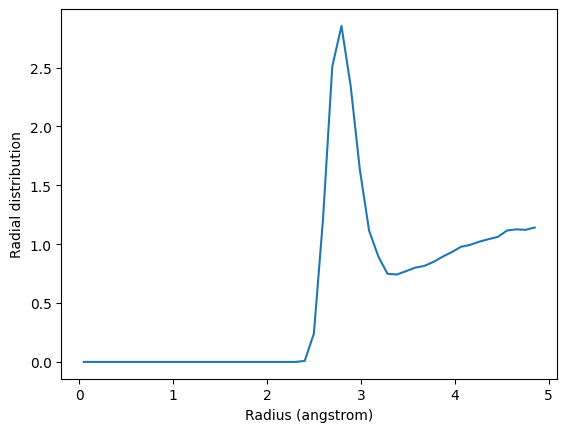

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ordf.bins, Ordf.rdf)
plt.xlabel("Radius (angstrom)")
plt.ylabel("Radial distribution")

Text(0, 0.5, 'Radial distribution')

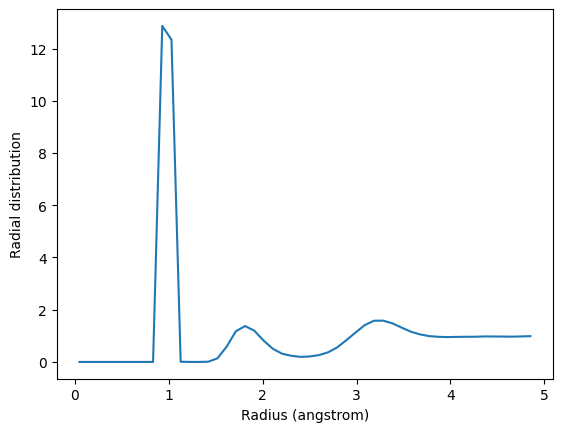

In [ ]:
plt.plot(OHrdf.bins, OHrdf.rdf)
plt.xlabel("Radius (angstrom)")
plt.ylabel("Radial distribution")

Text(0, 0.5, 'Radial distribution')

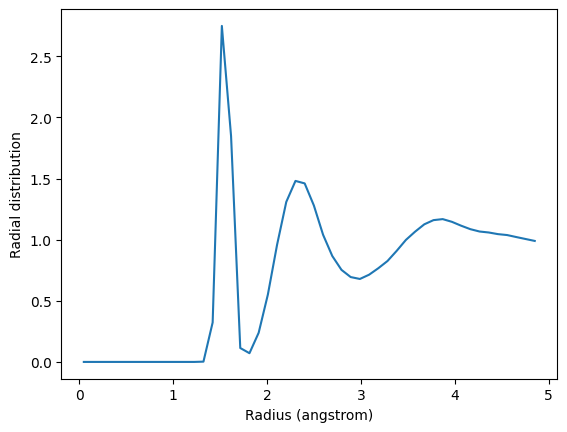

In [ ]:
plt.plot(HHrdf.bins, HHrdf.rdf)
plt.xlabel("Radius (angstrom)")
plt.ylabel("Radial distribution")